<a href="https://colab.research.google.com/github/eshu077/Loan-Detection-Model/blob/main/Loan_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('loan_detection.csv')
df

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [ ]:
df.shape

(41188, 60)

In [ ]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

In [ ]:
df.describe()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Imbalance data

In [ ]:
df['Loan_Status_label']

,Loan_Status_label
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
df['Loan_Status_label'].value_counts()

,count
Loan_Status_label,
0,36548
1,4640


In [ ]:
print(round(len(df[df['Loan_Status_label'] == 0])/len(df), 2))
print(round(len(df[df['Loan_Status_label'] == 1])/len(df), 2))

0.89
0.11


In [ ]:
# Missing data

In [ ]:
df.isnull().sum()

,0
age,0
campaign,0
pdays,0
previous,0
no_previous_contact,0
not_working,0
job_admin.,0
job_blue-collar,0
job_entrepreneur,0
job_housemaid,0


In [ ]:
df.isnull().mean()*100

,0
age,0.0
campaign,0.0
pdays,0.0
previous,0.0
no_previous_contact,0.0
not_working,0.0
job_admin.,0.0
job_blue-collar,0.0
job_entrepreneur,0.0
job_housemaid,0.0


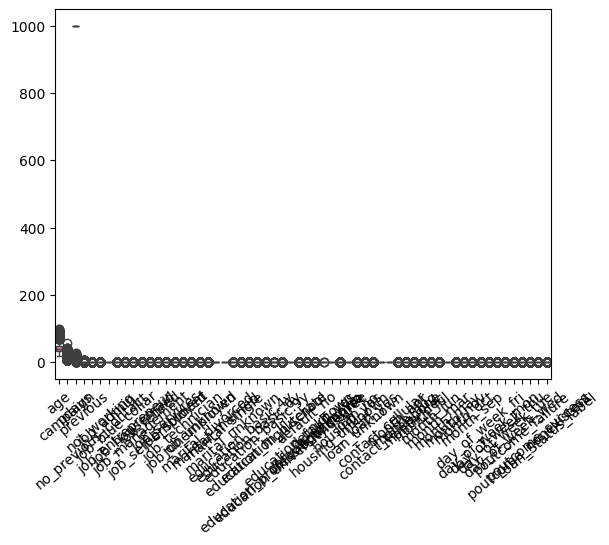

In [ ]:
# boxplot

sns.boxplot(df)
plt.xticks(rotation=40)
plt.show()


------------------------ age ------------------------


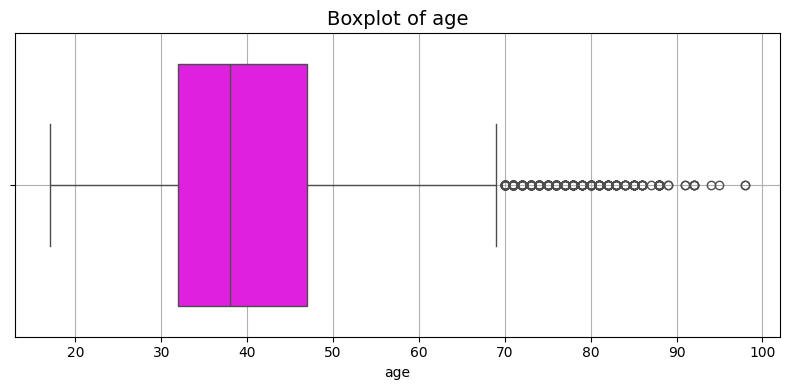


------------------------ campaign ------------------------


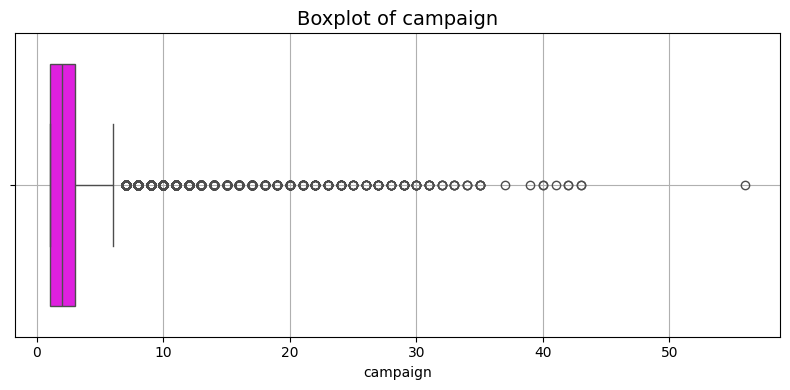


------------------------ pdays ------------------------


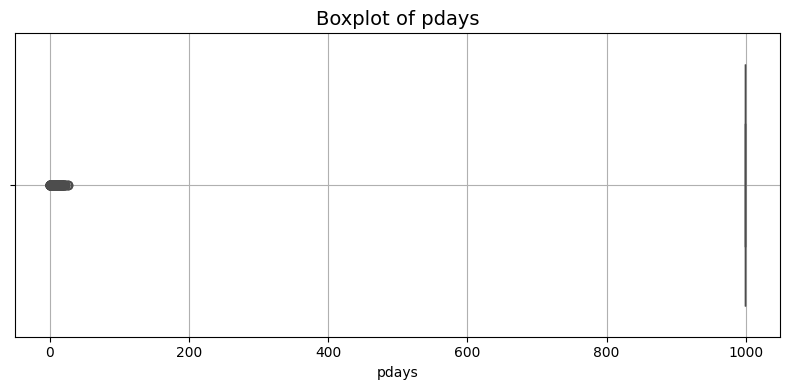


------------------------ previous ------------------------


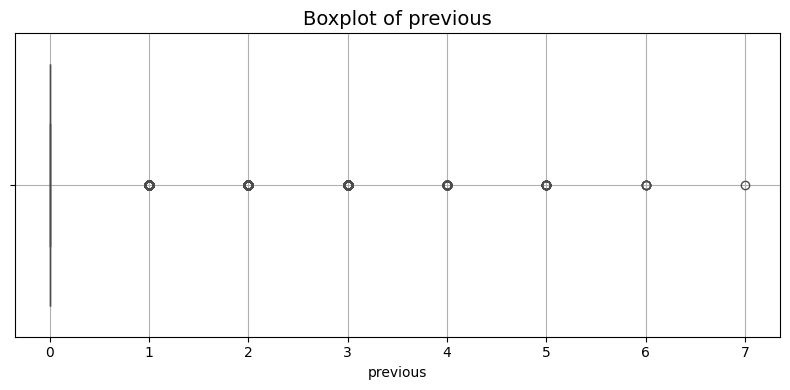

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define only the essential numerical columns
essential_numerical_cols = ['age', 'campaign', 'pdays', 'previous']

# Loop through selected columns
for col in essential_numerical_cols:
    print(f'\n------------------------ {col} ------------------------')
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='magenta')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# Using IQR, Removing Outliers

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("loan_detection.csv")

# Select only numerical columns
numerical_cols = ['age', 'campaign', 'pdays', 'previous']

# Function to remove outliers using IQR
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Apply outlier removal
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Save the cleaned dataset permanently
df_cleaned.to_csv("loan_detection_cleaned.csv", index=False)

# Check shape before and after
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)
print("✅ Cleaned dataset saved as 'loan_detection_cleaned.csv'")


Original shape: (41188, 60)
Cleaned shape: (33002, 60)
✅ Cleaned dataset saved as 'loan_detection_cleaned.csv'


In [ ]:
df_cleaned.shape

(33002, 60)


------------------------ age ------------------------


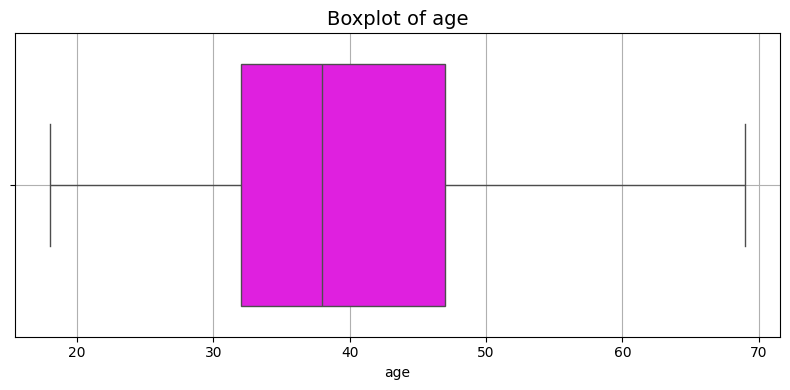


------------------------ campaign ------------------------


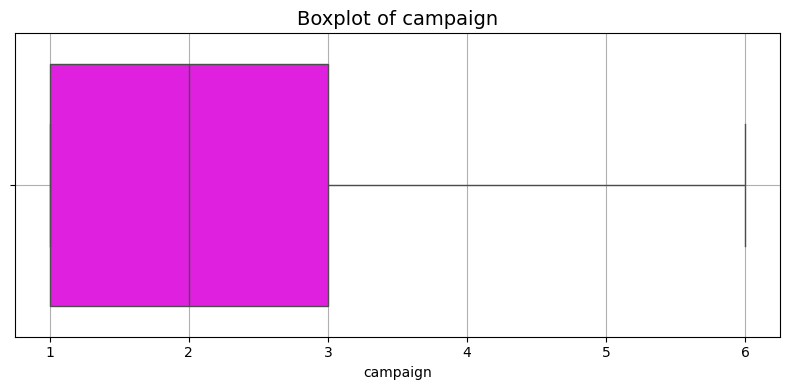


------------------------ pdays ------------------------


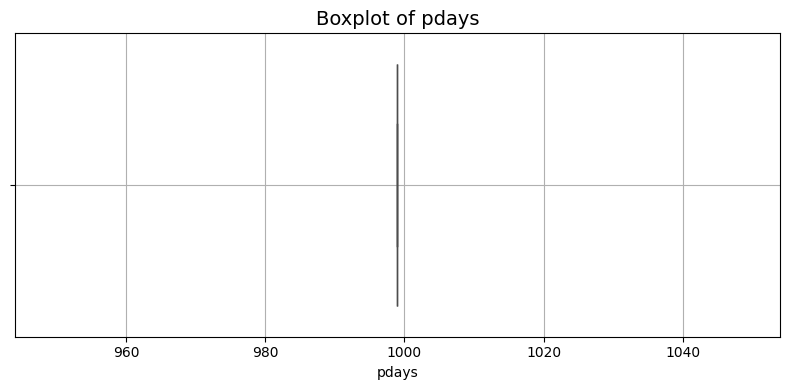


------------------------ previous ------------------------


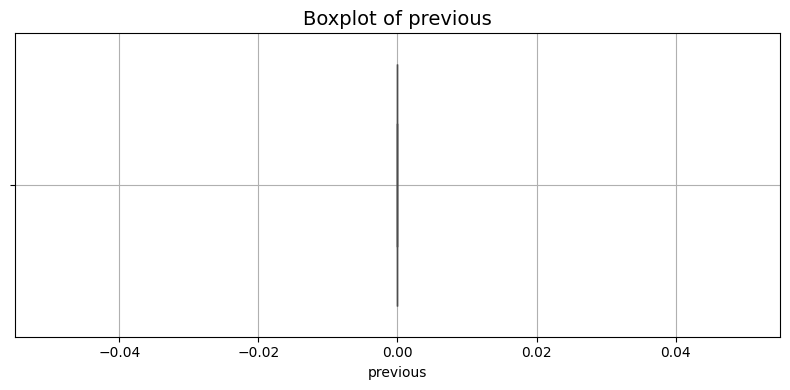

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define only the essential numerical columns
essential_numerical_cols = ['age', 'campaign', 'pdays', 'previous']

# Loop through selected columns
for col in essential_numerical_cols:
    print(f'\n------------------------ {col} ------------------------')
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col], color='magenta')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [ ]:
# Feature Selection

In [ ]:
df.corr()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
age,1.000000,0.004594,-0.034369,0.024365,-0.034292,0.207547,-0.102584,-0.024191,0.031213,0.085403,...,0.040889,0.007148,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.052569,-0.017529,0.011745,-0.001775,-0.002203,0.004226,...,-0.033953,0.026641,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.999992,-0.112797,-0.025398,0.065335,0.019246,-0.001649,...,-0.154629,0.013782,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.587462,0.104066,0.018888,-0.054845,-0.013239,-0.011569,...,0.157651,0.004404,-0.002012,0.001512,0.000090,-0.003929,0.682608,-0.878776,0.524045,0.230181
no_previous_contact,-0.034292,0.052569,0.999992,-0.587462,1.000000,-0.112795,-0.025412,0.065328,0.019247,-0.001638,...,-0.154616,0.013775,0.001009,-0.008187,-0.007282,0.001033,0.006104,0.491357,-0.950283,-0.324877
not_working,0.207547,-0.017529,-0.112797,0.104066,-0.112795,1.000000,-0.180369,-0.166824,-0.059324,-0.050367,...,0.085305,0.002009,-0.005305,-0.002442,0.008890,-0.002960,0.032294,-0.083051,0.104134,0.121246
job_admin.,-0.102584,0.011745,-0.025398,0.018888,-0.025412,-0.180369,1.000000,-0.313313,-0.111417,-0.094595,...,0.010407,0.009892,-0.000736,-0.003970,-0.001835,-0.003112,0.002771,-0.015560,0.025069,0.031426
job_blue-collar,-0.024191,-0.001775,0.065335,-0.054845,0.065328,-0.166824,-0.313313,1.000000,-0.103050,-0.087492,...,-0.054309,0.003329,-0.009754,-0.007062,-0.006829,0.020673,-0.013254,0.043843,-0.061403,-0.074423
job_entrepreneur,0.031213,-0.002203,0.019246,-0.013239,0.019247,-0.059324,-0.111417,-0.103050,1.000000,-0.031113,...,-0.009172,-0.001905,0.006828,0.005551,-0.007275,-0.003480,0.001595,0.007598,-0.017238,-0.016644
job_housemaid,0.085403,0.004226,-0.001649,-0.011569,-0.001638,-0.050367,-0.094595,-0.087492,-0.031113,1.000000,...,-0.003503,-0.007595,0.003365,-0.009014,0.011500,0.001797,-0.017853,0.014629,0.002276,-0.006505


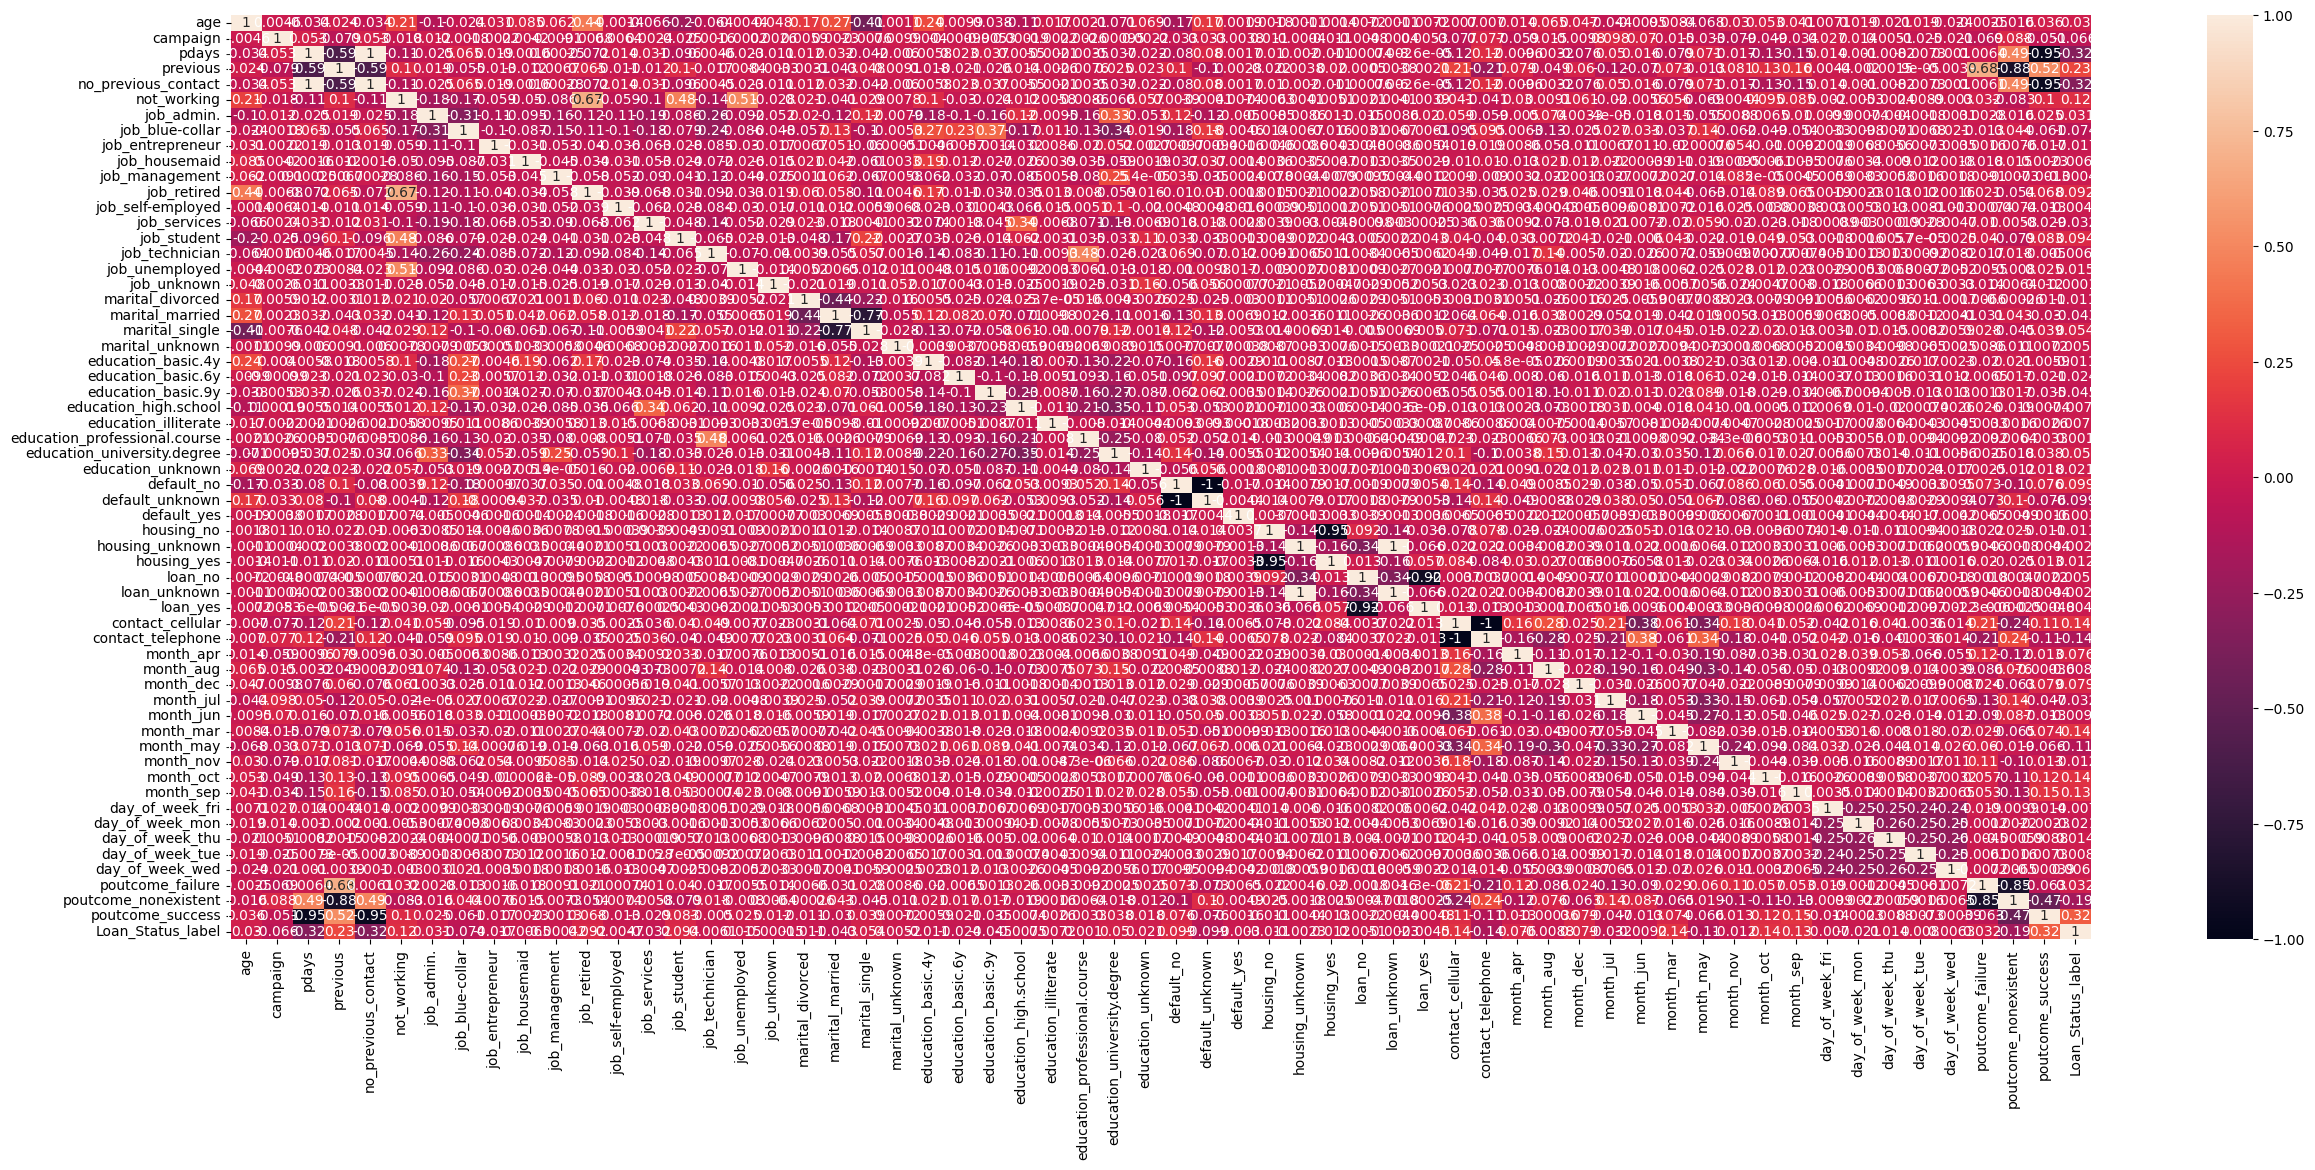

In [ ]:
plt.figure(figsize=(30,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.corr()['Loan_Status_label']

,Loan_Status_label
age,0.030399
campaign,-0.066357
pdays,-0.324914
previous,0.230181
no_previous_contact,-0.324877
not_working,0.121246
job_admin.,0.031426
job_blue-collar,-0.074423
job_entrepreneur,-0.016644
job_housemaid,-0.006505


In [ ]:
# Model_Building

In [ ]:
df_cleaned

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,2,999,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41181,37,1,999,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Separate independent and Dependent Data

In [ ]:
X = df_cleaned.drop(columns=['Loan_Status_label'], axis=1)
y = df_cleaned['Loan_Status_label']

In [ ]:
X

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,2,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41181,37,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
y

,Loan_Status_label
0,0
1,0
2,0
3,0
4,0
...,...
41180,0
41181,1
41184,0
41185,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2867,45,2,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32248,38,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
7059,57,1,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
28326,35,1,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
10216,35,4,999,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18229,37,4,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6576,53,1,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
12155,28,1,999,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
860,40,2,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
X_test

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
7808,38,4,999,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
10054,48,1,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
14191,33,2,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
31346,27,2,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
34629,25,2,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30183,40,1,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
23125,50,1,999,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
25791,43,1,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2141,51,1,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_train

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2867,45,2,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32248,38,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
7059,57,1,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
28326,35,1,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
10216,35,4,999,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18229,37,4,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6576,53,1,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
12155,28,1,999,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
860,40,2,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
X_train_sc

array([[ 0.5588841 , -0.06018612,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.17688428, -0.8315326 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.82020134, -0.8315326 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.22798198, -0.8315326 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03333526, -0.06018612,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.03042087, -0.8315326 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_test_sc

array([[-0.17688428,  1.48250684,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87421341, -0.8315326 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.70243313, -0.06018612,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.34866456, -0.8315326 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18954272, -0.8315326 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.6099818 ,  0.71116036,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# Model Selection

In [ ]:
# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

LogisticRegression()

In [ ]:
print(f'Training Accuracy : {round(lr.score(X_train_sc, y_train), 2)*100} %')
print(f'Test Accuracy : {round(lr.score(X_test_sc, y_test), 2)*100} %')

Training Accuracy : 91.0 %
Test Accuracy : 91.0 %


In [ ]:
# Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(X_train_sc, y_train)
print(f'Training Accuracy : {round(dtree.score(X_train_sc, y_train), 2)*100} %')
print(f'Test Accuracy : {round(dtree.score(X_test_sc, y_test), 2)*100} %')

Training Accuracy : 91.0 %
Test Accuracy : 91.0 %


In [ ]:
# Model Training

In [ ]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
# Model Prediction

In [ ]:
y_pred_train = dtree.predict(X_train_sc)
y_pred_test = dtree.predict(X_test_sc)

In [ ]:
X_train[:3]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2867,45,2,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32248,38,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
7059,57,1,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
y_train[:3]

,Loan_Status_label
2867,0
32248,0
7059,0


In [ ]:
y_pred_train[:3]

array([0, 0, 0])

In [ ]:
# Model Evaluation

In [ ]:
# Training Data

confusion_matrix(y_train, y_pred_train)

array([[23886,   159],
       [ 2164,   192]])

<Axes: >

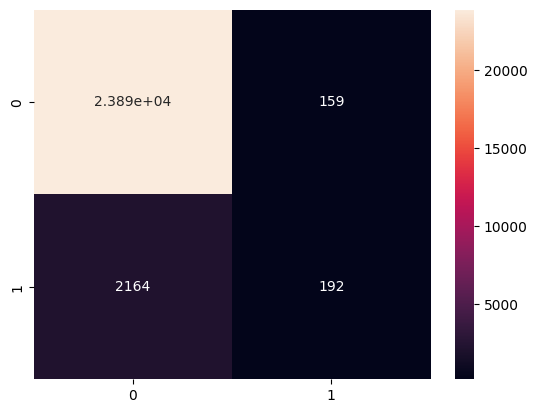

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='.4g')

In [ ]:
accuracy_score(y_train, y_pred_train)

0.9120109086777016

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     24045
           1       0.55      0.08      0.14      2356

    accuracy                           0.91     26401
   macro avg       0.73      0.54      0.55     26401
weighted avg       0.88      0.91      0.88     26401



In [ ]:
# Test Data

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[5982,   47],
       [ 531,   41]])

<Axes: >

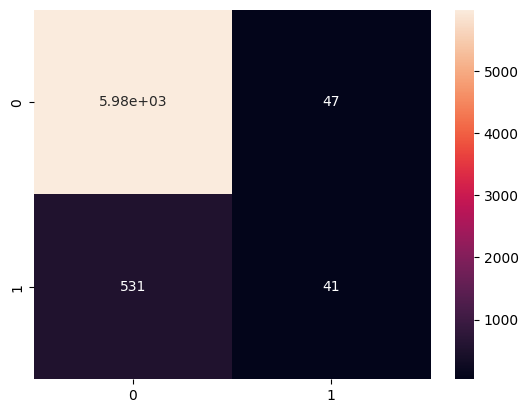

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.3g')

In [ ]:
accuracy_score(y_test, y_pred_test)

0.9124375094682624

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6029
           1       0.47      0.07      0.12       572

    accuracy                           0.91      6601
   macro avg       0.69      0.53      0.54      6601
weighted avg       0.88      0.91      0.88      6601



In [ ]:
# Sample Test

In [ ]:
X[:1]

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
y[:1]

,Loan_Status_label
0,0


In [ ]:
X.ndim

2

In [ ]:
# Visualisation

Training Data (first 5 rows):


,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
2867,45,2,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32248,38,1,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
7059,57,1,999,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
28326,35,1,999,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
10216,35,4,999,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0



Test Data (first 5 rows):


,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
7808,38,4,999,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
10054,48,1,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
14191,33,2,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
31346,27,2,999,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
34629,25,2,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0



Training Labels (first 5 rows):


,Loan_Status_label
2867,0
32248,0
7059,0
28326,0
10216,0



Test Labels (first 5 rows):


,Loan_Status_label
7808,1
10054,0
14191,0
31346,0
34629,0


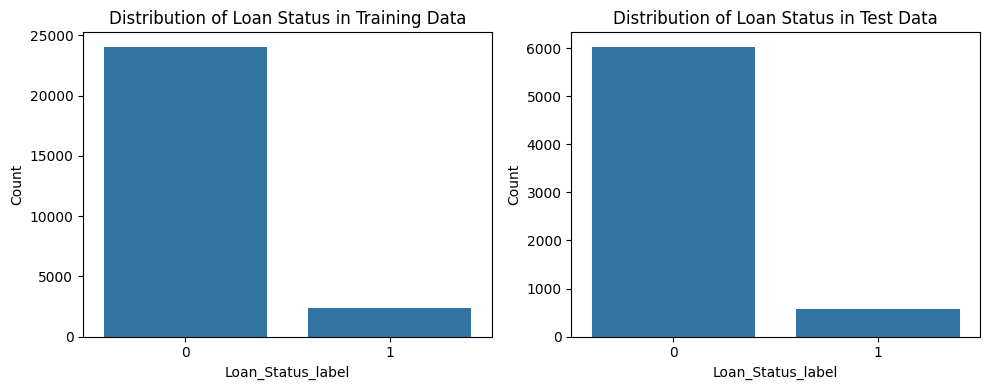

In [ ]:
print("Training Data (first 5 rows):")
display(X_train.head())
print("\nTest Data (first 5 rows):")
display(X_test.head())
print("\nTraining Labels (first 5 rows):")
display(y_train.head())
print("\nTest Labels (first 5 rows):")
display(y_test.head())

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribution of Loan Status in Training Data')
plt.xlabel('Loan_Status_label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Distribution of Loan Status in Test Data')
plt.xlabel('Loan_Status_label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()